    MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
Id                                                                            
0           60       RL     8450    Inside     1Fam            5       2003   
1           20       RL     9600       FR2     1Fam            8       1976   
2           60       RL    11250    Inside     1Fam            5       2001   
3           70       RL     9550    Corner     1Fam            5       1915   
4           60       RL    14260       FR2     1Fam            5       2000   

    YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
Id                                                                
0           2003     VinylSd         0.0        856.0   208500.0  
1           1976     MetalSd         0.0       1262.0   181500.0  
2           2002     VinylSd         0.0        920.0   223500.0  
3           1970     Wd Sdng         0.0        756.0   140000.0  
4           2000     VinylSd         0.0    

<ipython-input-9-37faa711e46a>:42: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot = True, cmap = 'magma')


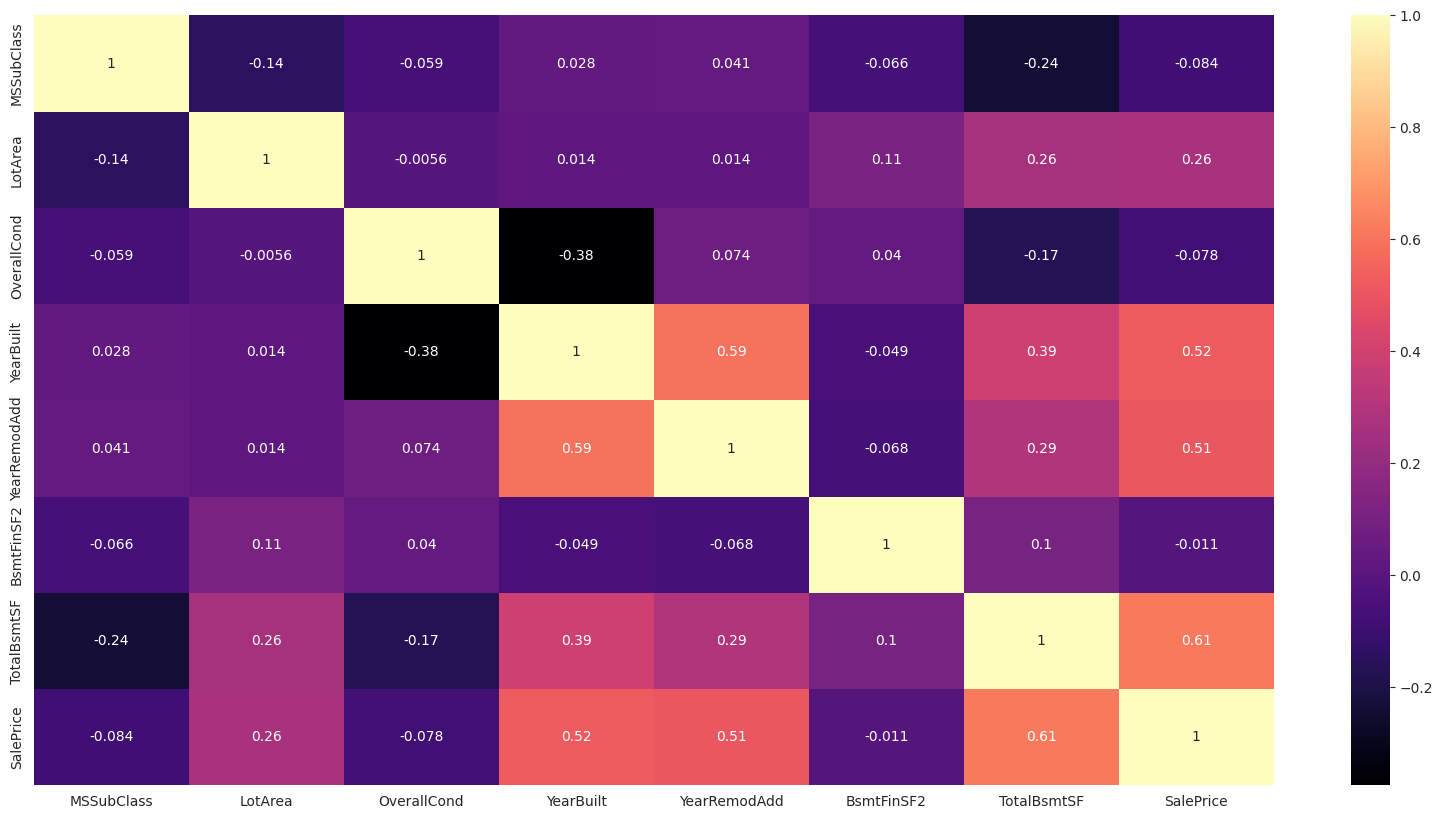

<ipython-input-9-37faa711e46a>:49: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['SalePrice'], color = 'r')


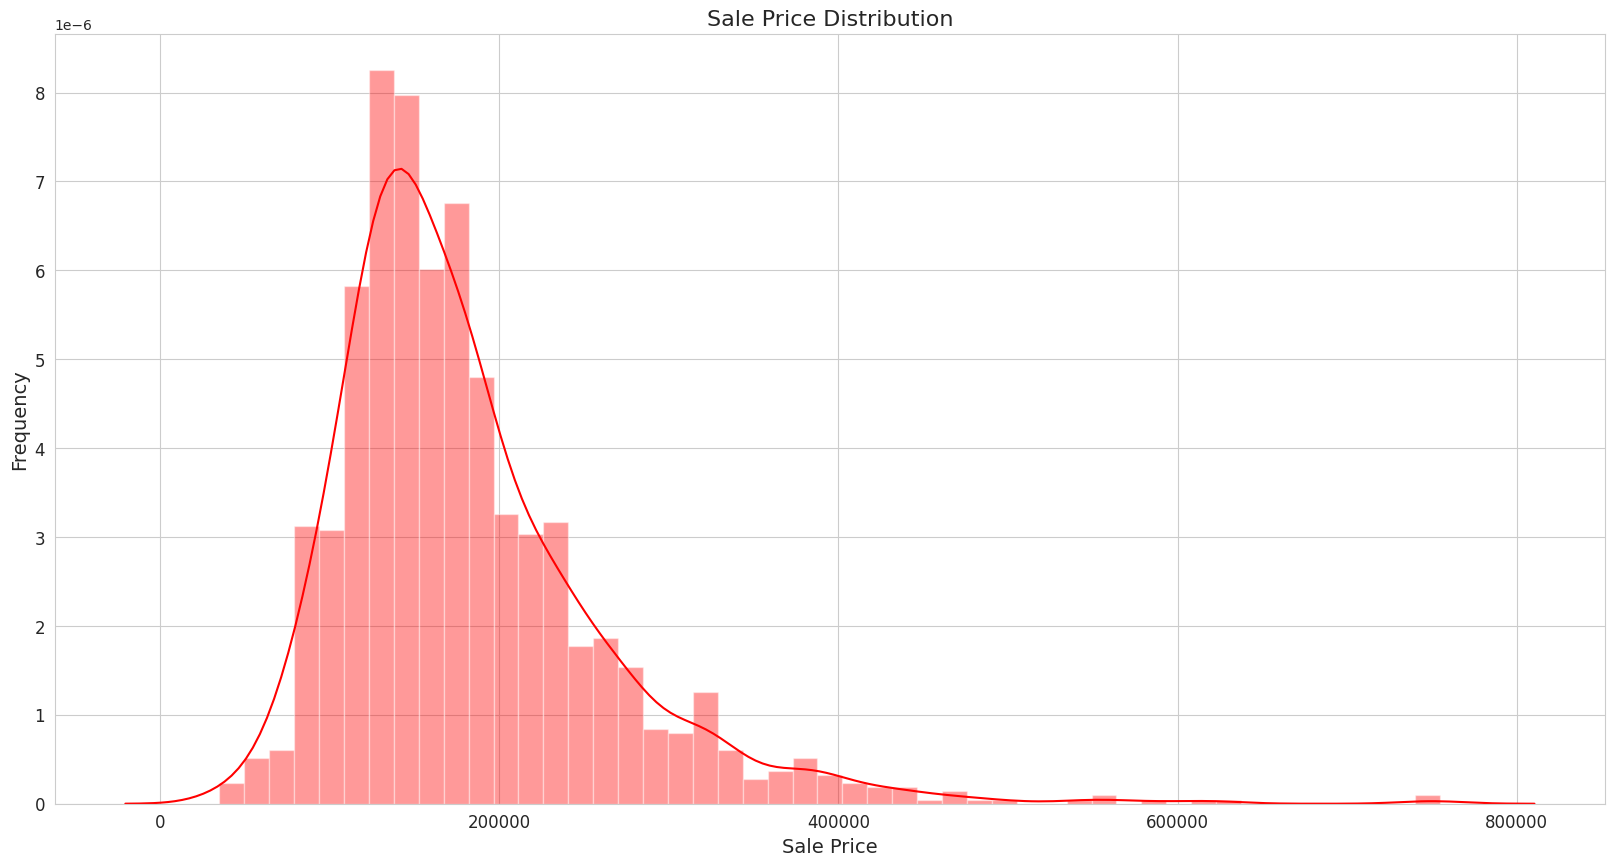

X_train samples :  [[11694.     0.  1822.]
 [ 6600.     0.   894.]
 [13360.     0.   876.]
 [13265.     0.  1568.]
 [13704.     0.  1541.]]
X_test samples :  [[32668.     0.  2035.]
 [ 9490.   165.   806.]
 [ 7015.     0.   709.]
 [10005.     0.  1160.]
 [ 1680.     0.   525.]]
y_train samples :  [314813. 109500. 163500. 271000. 205000.]
y_test samples :  [200624. 133000. 110000. 192000.  88000.]
EXPLAINED VARIANCE SCORE:
Explained Variance Score of linear regression model is 0.26912668118961225
R-SQUARED:
R-Squared of linear regression model is 0.2689325692836426


In [9]:

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

# IMPORTING DATA

df = pd.read_csv('HousePricePrediction.csv')
df.set_index('Id', inplace = True)

print(df.head(5))

# EDA

df.dropna(inplace = True)

print(cl(df.isnull().sum(), attrs = ['bold']))

print(df.describe())

print(cl(df.dtypes, attrs = ['bold']))

df['LotArea'] = pd.to_numeric(df['LotArea'], errors = 'coerce')
df['LotArea'] = df['LotArea'].astype('int64')

print(cl(df.dtypes, attrs = ['bold']))

# DATA VISUALIZATION

# 1. Heatmap

sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

# 2. Distribution plot

sb.distplot(df['SalePrice'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

# FEATURE SELECTION & DATA SPLIT

X_var = df[['LotArea',  'BsmtFinSF2', 'TotalBsmtSF']].values
y_var = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

# MODELING

# 1. linear regression

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# EVALUATION

# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))

print(cl('Explained Variance Score of linear regression model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))



# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))

print(cl('R-Squared of linear regression model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))


In [12]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, ols_yhat))

0.2682874536166532


In [14]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 5
Float variables: 3


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

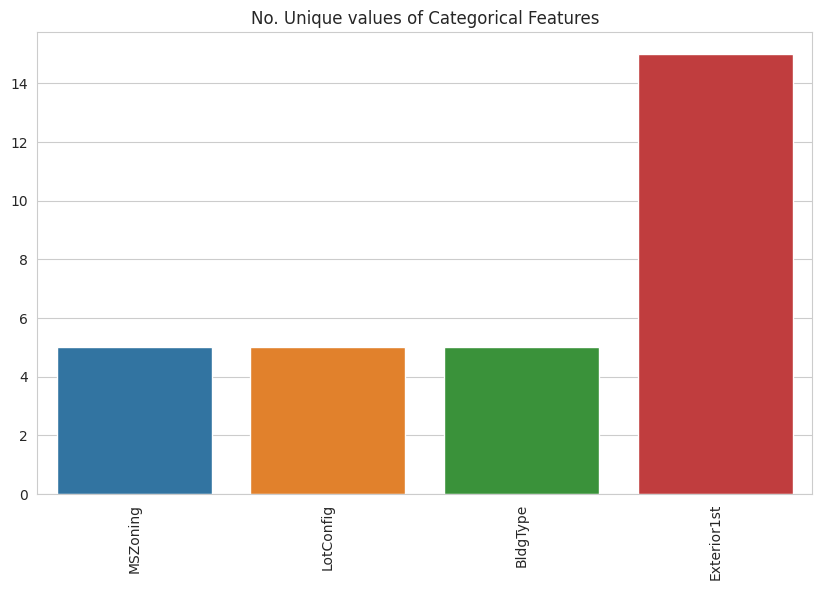

In [15]:
import seaborn as sns
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

<ipython-input-16-fb17338692b1>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


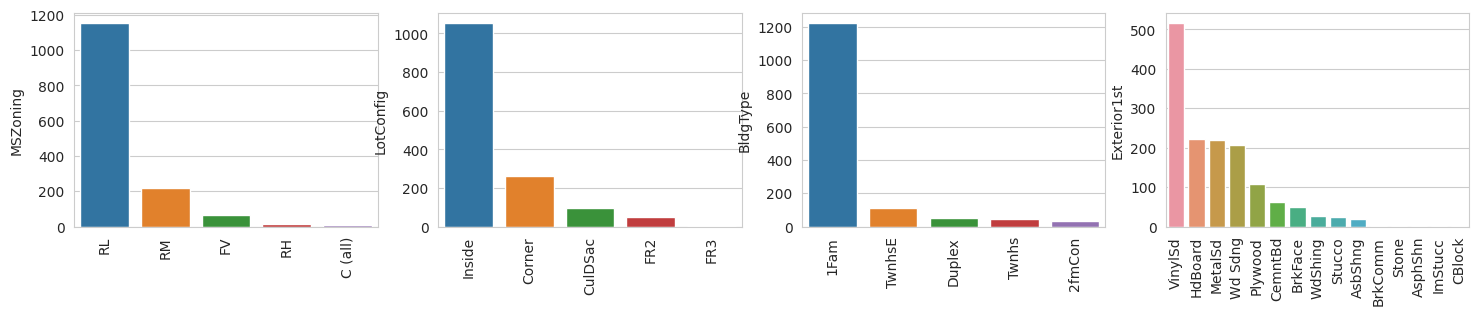

In [16]:

plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1